## EDA - 2 - Spotify Data Analysis

## About Dataset

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.

#### Dataset link : https://drive.google.com/file/d/1a7k_HhliLygmYUaA7FAslVOcTUAoknpv/view?usp=sharing

## Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

## Feature Desciption

Artist: The name of the artist, providing direct attribution to the creative mind behind the track.
Track Name: The title of the track, encapsulating its identity and essence.
Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.
Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.
Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows. Handle missing values and remove duplicate rows if necessary.

In [2]:
df = pd.read_csv("spotify.csv")
df.head(10)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
5,Drake,God's Plan,87,198973,6DCZcSspjsKoFjzjrWoCdn
6,Drake,Passionfruit,86,298940,5mCPDVBb16L4XQwDdbRUpz
7,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
8,Drake,Fair Trade (with Travis Scott),85,291175,40iJIUlhi6renaREYGeIDS
9,Drake,Rich Flex,85,239359,1bDbXMyjaUIooNwFE9wn0N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [4]:
df.duplicated().sum()

27

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

#### 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

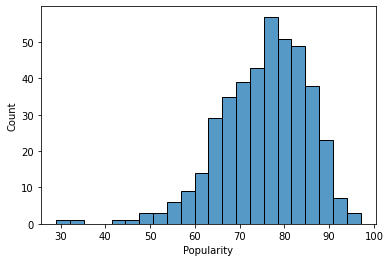

In [7]:
sns.histplot(df['Popularity'])
plt.show()

#### 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [8]:
df[['Popularity','Duration (ms)']].corr()

,Popularity,Duration (ms)
Popularity,1.000000,0.038992
Duration (ms),0.038992,1.000000


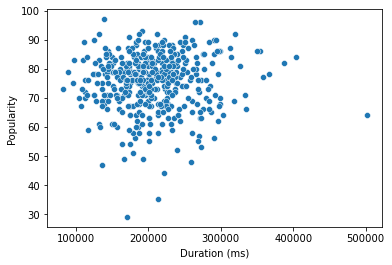

In [9]:
sns.scatterplot(x = df['Duration (ms)'], y = df['Popularity'])
plt.show()

#### 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [10]:
df.head(3)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE


In [11]:
artistTrack = df.groupby(['Artist'])['Track Name'].count().reset_index()
artistTrack = artistTrack.sort_values(by = 'Track Name' , ascending=False).head(10)
artistTrack

,Artist,Track Name
29,Drake,17
33,Eminem,11
114,¥$,10
2,21 Savage,10
102,Timbaland,10
69,Ludacris,10
63,Lil Nas X,10
46,JAY-Z,10
36,Flo Rida,10
103,Travis Scott,9


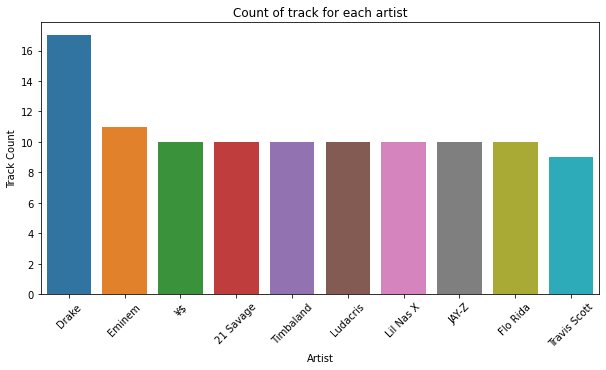

In [12]:
plt.figure(figsize = (10,5))
sns.barplot(x = artistTrack['Artist'] , y = artistTrack['Track Name'])
plt.title("Count of track for each artist")
plt.xlabel("Artist")
plt.xticks(rotation = 45)
plt.ylabel("Track Count")
plt.show()

- The Artist "Drake" has the highest number of track in the dataset.

#### 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [13]:
df[['Popularity','Artist','Track Name']].sort_values(by = "Popularity").head(5)

,Popularity,Artist,Track Name
207,29,Pressa,Attachments (feat. Coi Leray)
231,35,Justin Bieber,Intentions
413,44,French Montana,Splash Brothers
225,47,Lil Baby,On Me - Remix
407,48,Wyclef Jean,911 (feat. Mary J. Blige)


- Above are the top 5 least popular tracks in the dataset.

#### 6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [14]:
## group the dataset based on artist then count the total popularity.
## based on the count of popularity for each artist sort the data in descending order.
## find the avg popularity for each artist

In [15]:
## popular artists are those whose popularity count is high
df.groupby(['Artist'])['Popularity'].aggregate(['count','mean']).reset_index().sort_values(by = 'count',ascending = False).head(5)

,Artist,count,mean
29,Drake,17,82.882353
33,Eminem,11,83.636364
114,¥$,10,85.100000
2,21 Savage,10,83.800000
102,Timbaland,10,69.000000


- These are the top 5 most popular artists.

#### 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [16]:
df.head(3)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE


In [17]:
# ['Drake' , 'Eminem' , '¥$' , '21 Savage' , 'Timbaland']
mostPoptrack = df[(df['Artist'] == 'Drake') | (df['Artist'] == 'Eminem') | (df['Artist'] == '¥$') | (df['Artist'] == '21 Savage') | (df['Artist'] == 'Timbaland')]
mostPoptrack.head(5)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [18]:
newdf = mostPoptrack.groupby(['Artist'])['Popularity'].max().reset_index()
newdf

,Artist,Popularity
0,21 Savage,96
1,Drake,92
2,Eminem,90
3,Timbaland,85
4,¥$,96


In [19]:
finaldf = pd.merge(newdf , mostPoptrack , how='left')
finaldf[['Artist' , 'Track Name']]

,Artist,Track Name
0,21 Savage,redrum
1,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA)
2,Eminem,Without Me
3,Timbaland,The Way I Are
4,¥$,CARNIVAL


- These above are the track name for each of 5 popular artists.

#### 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

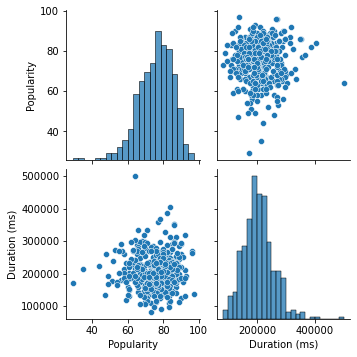

In [20]:
pairdf = df[['Popularity','Duration (ms)']]
sns.pairplot(pairdf ,)
plt.show()

#### 9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

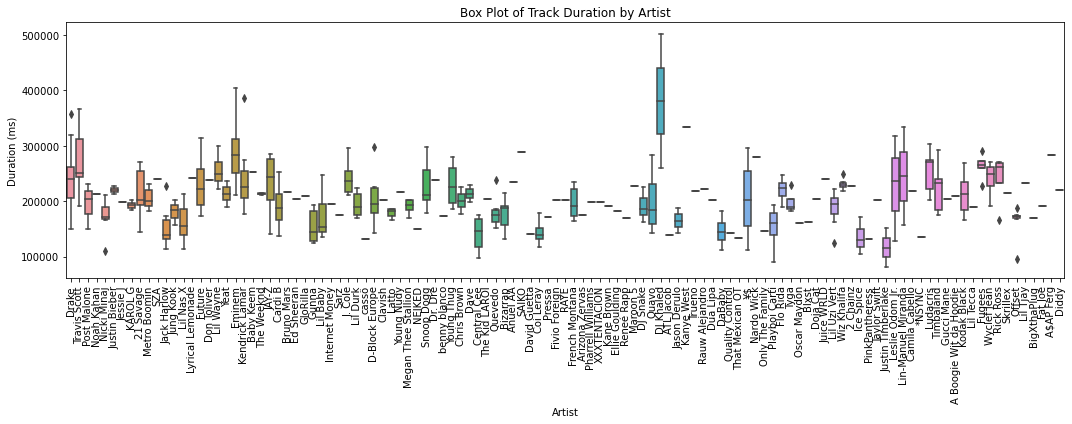

In [30]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Box Plot of Track Duration by Artist')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plots
plt.tight_layout()
plt.show()

#### 10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

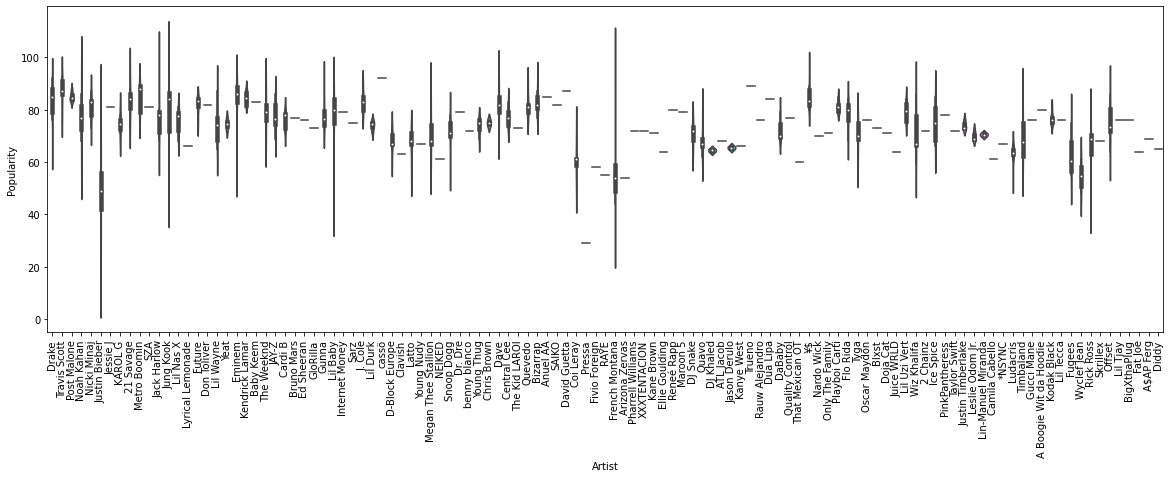

In [34]:
plt.figure(figsize=(20, 6))
sns.violinplot(x = df['Artist'] , y = df['Popularity'])
plt.xticks(rotation = 90)
plt.show()